# Chicago Taxi Trips in Year 2022
#### Copyright © 2024 Danny Ng

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format='retina'

# Step 1: Read the data

In [2]:
df = pd.read_csv('chicago_taxi_trip_sample.csv')

In [3]:
df.shape

(100000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   trip_id       100000 non-null  object 
 1   taxi_id       100000 non-null  object 
 2   month         100000 non-null  int64  
 3   day_of_week   100000 non-null  int64  
 4   hour          100000 non-null  int64  
 5   pickup_area   100000 non-null  object 
 6   dropoff_area  100000 non-null  object 
 7   trip_miles    100000 non-null  float64
 8   trip_seconds  100000 non-null  int64  
 9   fare          100000 non-null  float64
 10  tips          100000 non-null  float64
 11  tips_percent  100000 non-null  float64
 12  tolls         100000 non-null  float64
 13  extras        100000 non-null  float64
 14  trip_total    100000 non-null  float64
 15  payment_type  100000 non-null  object 
 16  company       100000 non-null  object 
dtypes: float64(7), int64(4), object(6)
memory usage: 

In [5]:
df.head(2)

,trip_id,taxi_id,month,day_of_week,hour,pickup_area,dropoff_area,trip_miles,trip_seconds,fare,tips,tips_percent,tolls,extras,trip_total,payment_type,company
0,259f9c40ef9,f9bc93,1,5,0,Other,Other,0.35,151,4.25,0.0,0.0,0.0,1.0,5.25,Cash,City Service
1,0f61207c6d8,271cde,1,5,0,Downtown,Other,0.53,918,8.50,0.0,0.0,0.0,0.0,8.50,Cash,Sun Taxi


In [6]:
df.tail(2)

,trip_id,taxi_id,month,day_of_week,hour,pickup_area,dropoff_area,trip_miles,trip_seconds,fare,tips,tips_percent,tolls,extras,trip_total,payment_type,company
99998,ed987453c4c,a48535,12,5,23,Downtown,Other,4.09,804,14.0,0.0,0.0,0.0,1.0,15.0,Cash,City Service
99999,6f2cde448af,361804,12,5,23,Other,Other,13.10,1080,33.0,0.0,0.0,0.0,0.0,33.0,Other,Taxi Affiliation Services


In [7]:
df.describe().transpose().astype({'count': int}) # Only numerical columns

,count,mean,std,min,25%,50%,75%,max
month,100000,6.936080,3.229650,1.00,4.0,7.000,10.00,12.000
day_of_week,100000,2.882130,1.899382,0.00,1.0,3.000,4.00,6.000
hour,100000,13.862130,5.221752,0.00,10.0,14.000,18.00,23.000
trip_miles,100000,6.121182,6.374934,0.01,1.2,2.900,10.60,83.000
trip_seconds,100000,1156.478920,905.061445,1.00,489.0,869.000,1585.00,7197.000
fare,100000,20.141239,14.962318,3.25,8.0,13.250,30.75,187.250
tips,100000,2.511505,3.578416,0.00,0.0,1.000,3.39,50.000
tips_percent,100000,0.133331,0.178893,0.00,0.0,0.062,0.23,11.111
tolls,100000,0.001443,0.075218,0.00,0.0,0.000,0.00,7.000
extras,100000,1.067526,1.897453,0.00,0.0,0.000,1.00,20.000


In [8]:
df.describe(include=object).transpose() # Only non-numerical columns

,count,unique,top,freq
trip_id,100000,100000,259f9c40ef9,1
taxi_id,100000,2736,8da9e1,175
pickup_area,100000,4,Downtown,48862
dropoff_area,100000,4,Other,47745
payment_type,100000,3,Credit Card,38222
company,100000,28,Flash Cab,21272


# Step 2: Define business problem

#### Business Problem

> A rideshare company would like to enter the Chicago market with an attractive tipping strategy. To this end, they want to understand how Chicago taxi trip's tips is related to other factors of the trip.

#### Task

> Build a logistic regression model using historical Chicago taxi trip data from year 2022 with tipping of $5+ as the response variable and other useful information as explanatory variables.

#### Some Considerations

- **Easy or difficulty task?**
    - Intuitively, the amount of `tips` might be positively correlated with `fare` or `trip_total`.
- **Actionable**
    - From the rideshare company's perspective, neither `payment_type` nor `company` would be actionable even if they were useful explanatory variables. 

In [9]:
df['tips_5'] = df['tips'] >= 5

# Step 3: Do feature engineering
- See `chicago_taxi_trip_sampling.ipynb`

In [10]:
df['early_morning'] = df['hour'].isin({4, 5, 6})

df['airport'] = df['pickup_area'].isin({'Midway', 'O\'Hare'}) | df['dropoff_area'].isin({'Midway', 'O\'Hare'})

df['trip_minutes'] = df['trip_seconds'] / 60
df['speed'] = df['trip_miles'] / df['trip_minutes'] * 60 # Miles per hour

In [11]:
df.head(2)

,trip_id,taxi_id,month,day_of_week,hour,pickup_area,dropoff_area,trip_miles,trip_seconds,fare,...,tolls,extras,trip_total,payment_type,company,tips_5,early_morning,airport,trip_minutes,speed
0,259f9c40ef9,f9bc93,1,5,0,Other,Other,0.35,151,4.25,...,0.0,1.0,5.25,Cash,City Service,False,False,False,2.516667,8.344371
1,0f61207c6d8,271cde,1,5,0,Downtown,Other,0.53,918,8.50,...,0.0,0.0,8.50,Cash,Sun Taxi,False,False,False,15.300000,2.078431


# Step 4: Exploratory data analysis and visualization

In [12]:
# Q: Any imbalance in class labels?
(df['tips_5']
 .value_counts()
 .to_frame()
 .assign(percent=lambda x: x['count'] / x['count'].sum() * 100))

,count,percent
tips_5,,
False,81061,81.061
True,18939,18.939


In [13]:
# Q: What is the distribution of early morning hours?
(df['early_morning']
 .value_counts()
 .to_frame()
 .assign(percent=lambda x: x['count'] / x['count'].sum() * 100))

,count,percent
early_morning,,
False,96770,96.77
True,3230,3.23


In [14]:
# Q: What is the distribution of airport trips?
(df['airport']
 .value_counts()
 .to_frame()
 .assign(percent=lambda x: x['count'] / x['count'].sum() * 100))

,count,percent
airport,,
False,76046,76.046
True,23954,23.954


In [15]:
# Q: Any outlier in speed?
df['speed'].min(), df['speed'].max(), (df['speed'] > 60).sum()

(0.013201320132013201, 65916.0, 236)

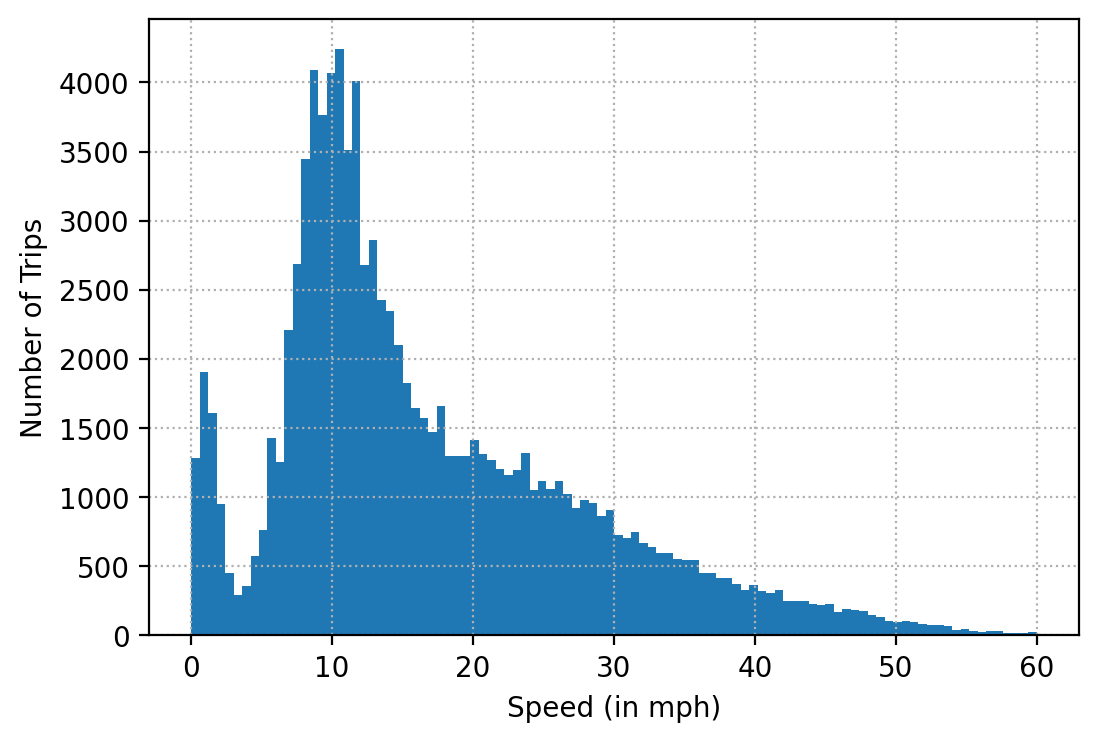

In [16]:
# Q: What is the distribution of speed?
ax = (df['speed'][df['speed'] <= 60]).hist(figsize=(6, 4), bins=100, grid=False)
ax.grid(linestyle=':')
ax.set_xlabel('Speed (in mph)')
ax.set_ylabel('Number of Trips');

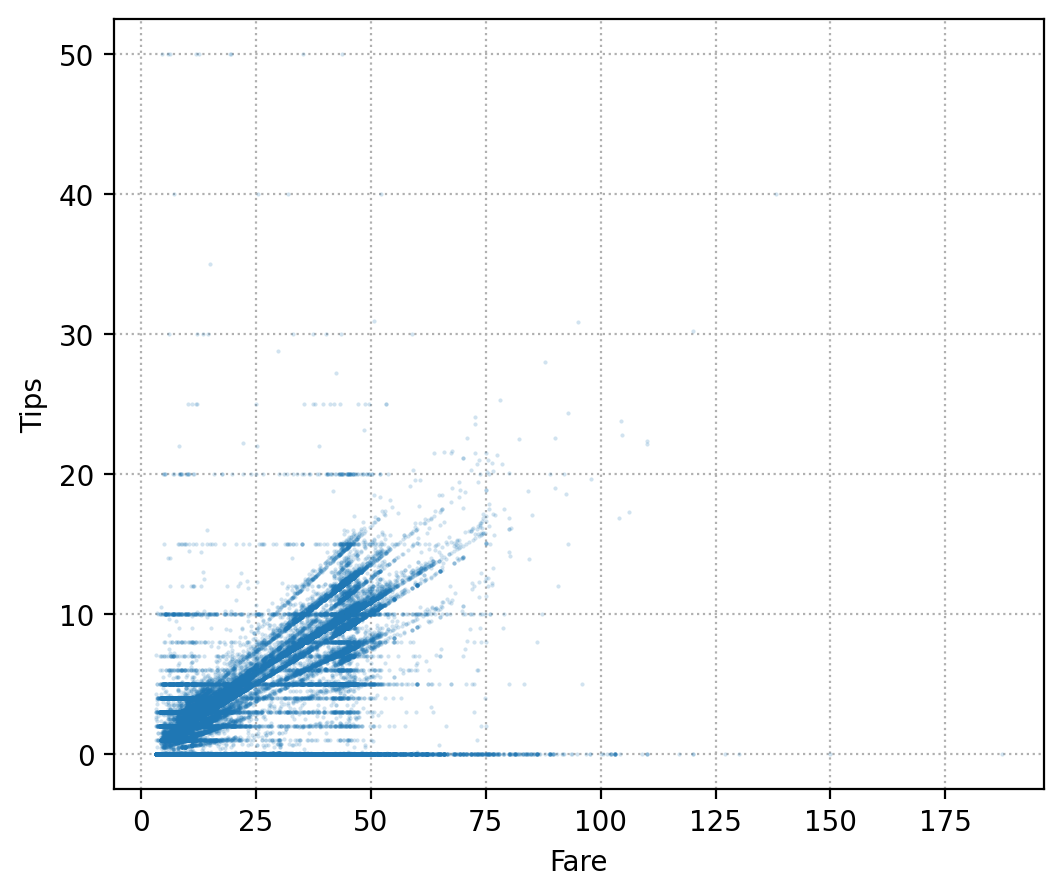

In [17]:
# Q: What is the relationship between fare vs tips?
plt.figure(figsize=(6, 5))
plt.plot(df['fare'], df['tips'], '.', markersize=1, alpha=0.2)
plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Tips')
plt.show()

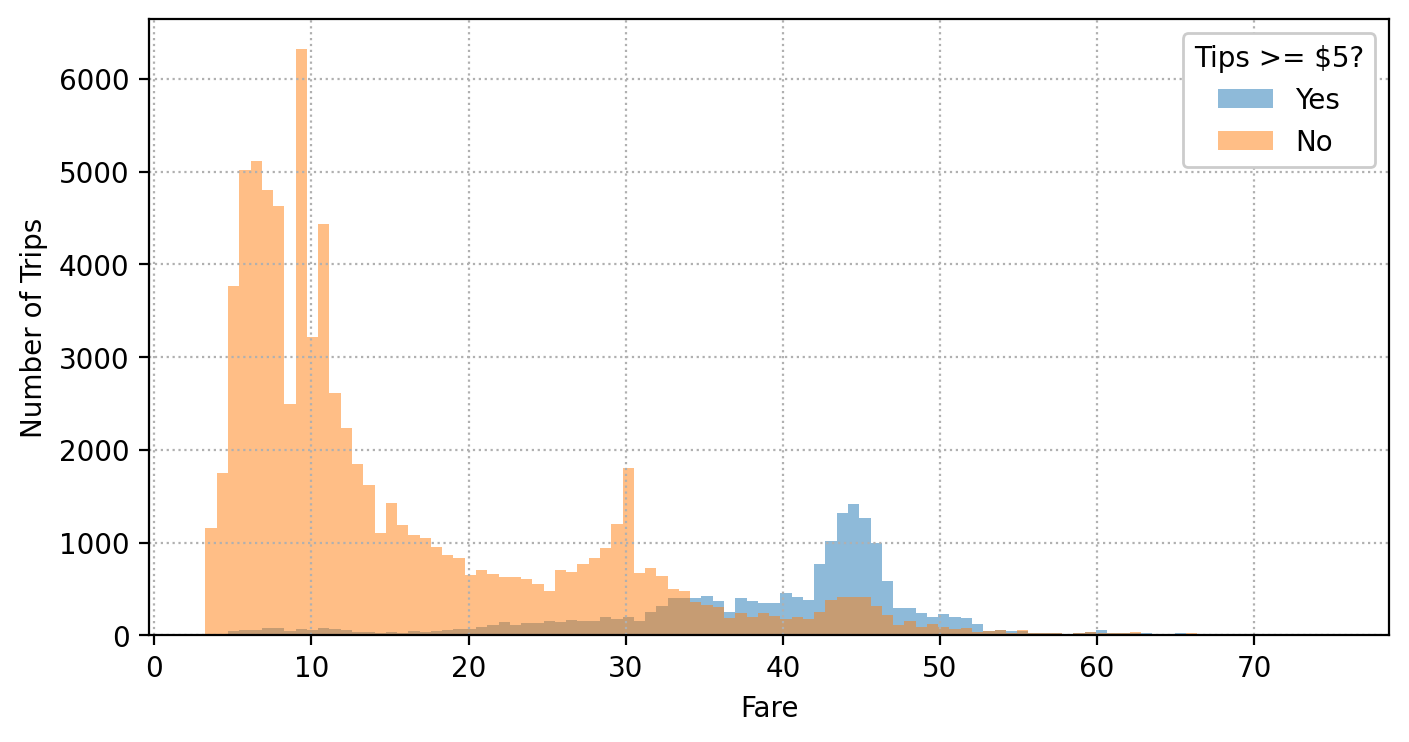

In [18]:
# Q: What is the distribution of fare per class label?
plt.figure(figsize=(8, 4))
x = 'fare'
plt.hist(df[x][(df[x] <= 75) & df['tips_5']], bins=100, alpha=0.5, label='Yes')
plt.hist(df[x][(df[x] <= 75) & ~df['tips_5']], bins=100, alpha=0.5, label='No')
plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Number of Trips')
plt.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
plt.show()

In [4]:
# Q: What is the distribution of fare per class label?
plt.figure(figsize=(8, 4))
sns.histplot(x='fare',data=df[(df[x] <= 75) & df['tips_5']], hue = 'tips_5')
plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Number of Trips')
plt.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
plt.show()

NameError: name 'plt' is not defined

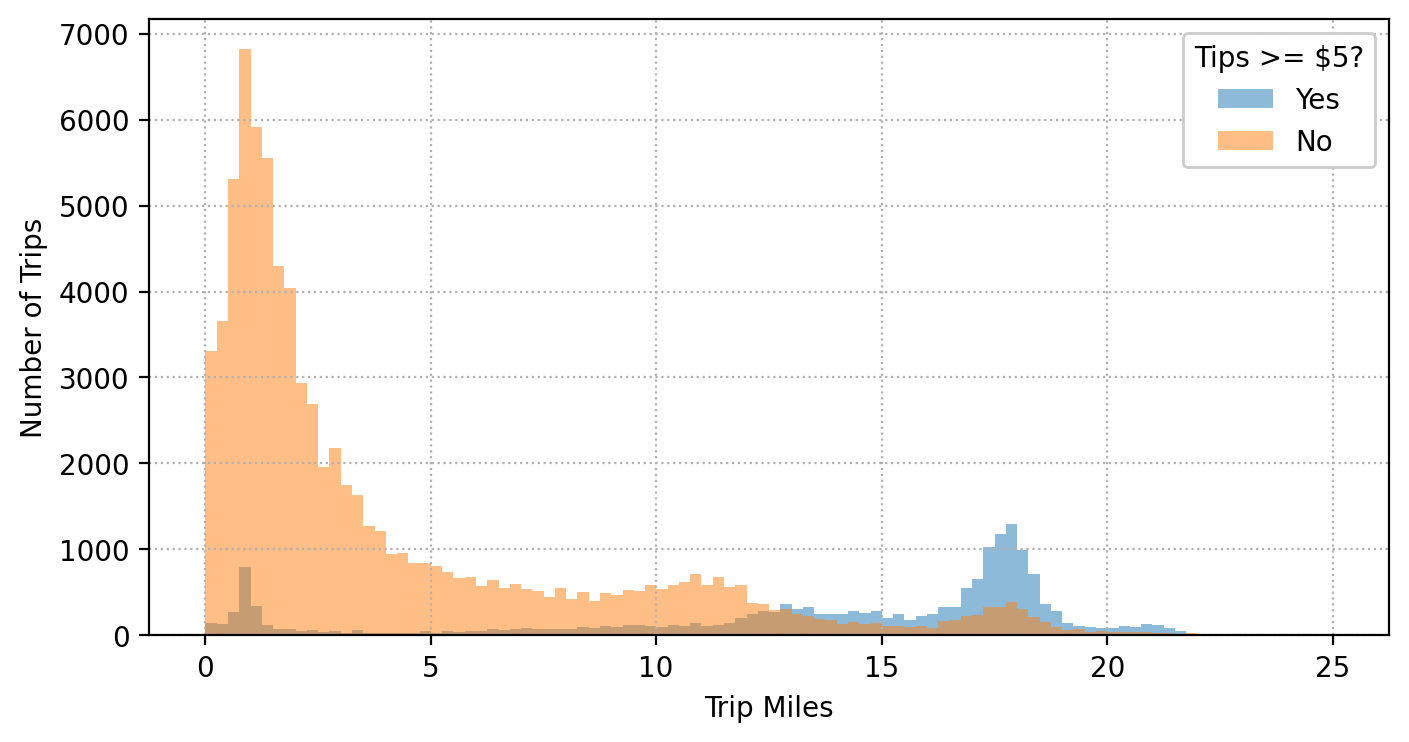

In [19]:
# Q: What is the distribution of trip miles per class label?
plt.figure(figsize=(8, 4))
x = 'trip_miles'
plt.hist(df[x][(df[x] <= 25) & df['tips_5']], bins=100, alpha=0.5, label='Yes')
plt.hist(df[x][(df[x] <= 25) & ~df['tips_5']], bins=100, alpha=0.5, label='No')
plt.grid(linestyle=':')
plt.xlabel('Trip Miles')
plt.ylabel('Number of Trips')
plt.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
plt.show()

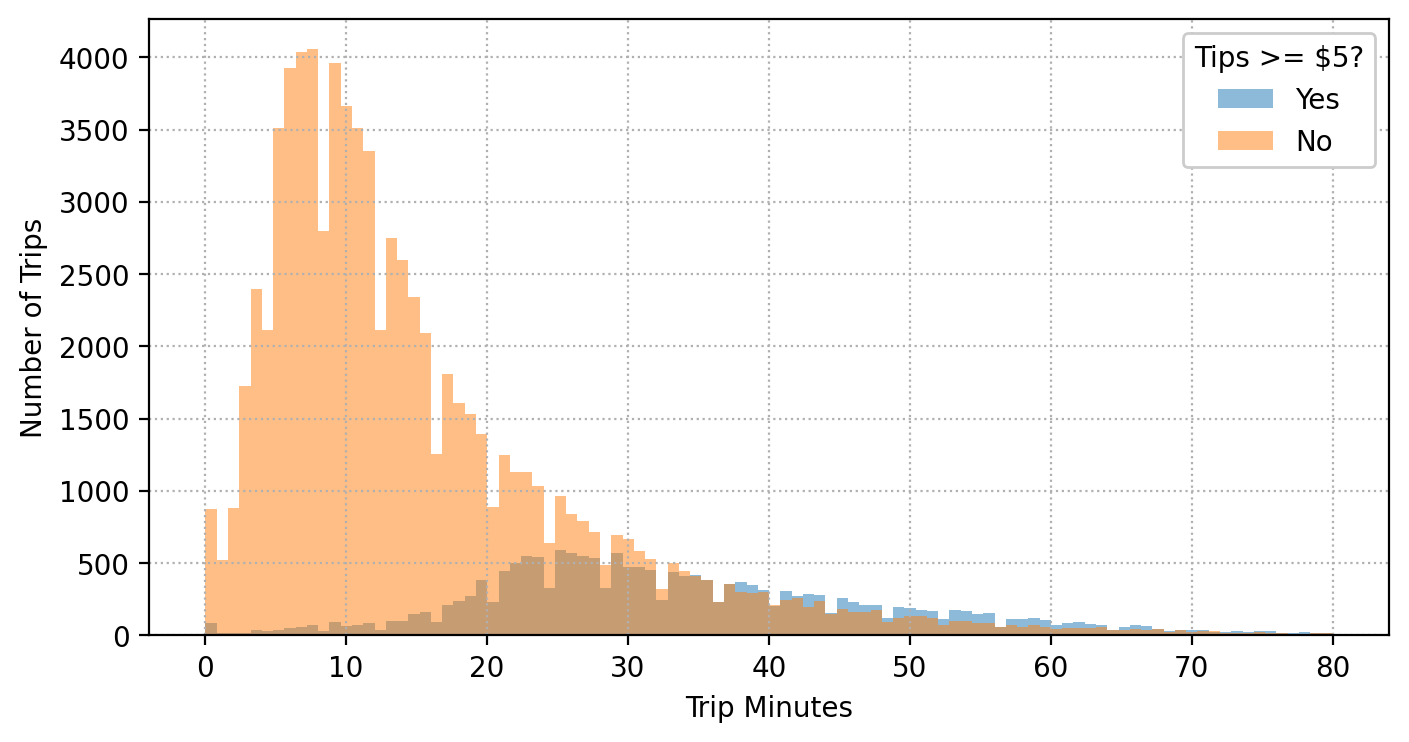

In [20]:
# Q: What is the distribution of trip minutes per class label?
plt.figure(figsize=(8, 4))
x = 'trip_minutes'
plt.hist(df[x][(df[x] <= 80) & df['tips_5']], bins=100, alpha=0.5, label='Yes')
plt.hist(df[x][(df[x] <= 80) & ~df['tips_5']], bins=100, alpha=0.5, label='No')
plt.grid(linestyle=':')
plt.xlabel('Trip Minutes')
plt.ylabel('Number of Trips')
plt.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
plt.show()

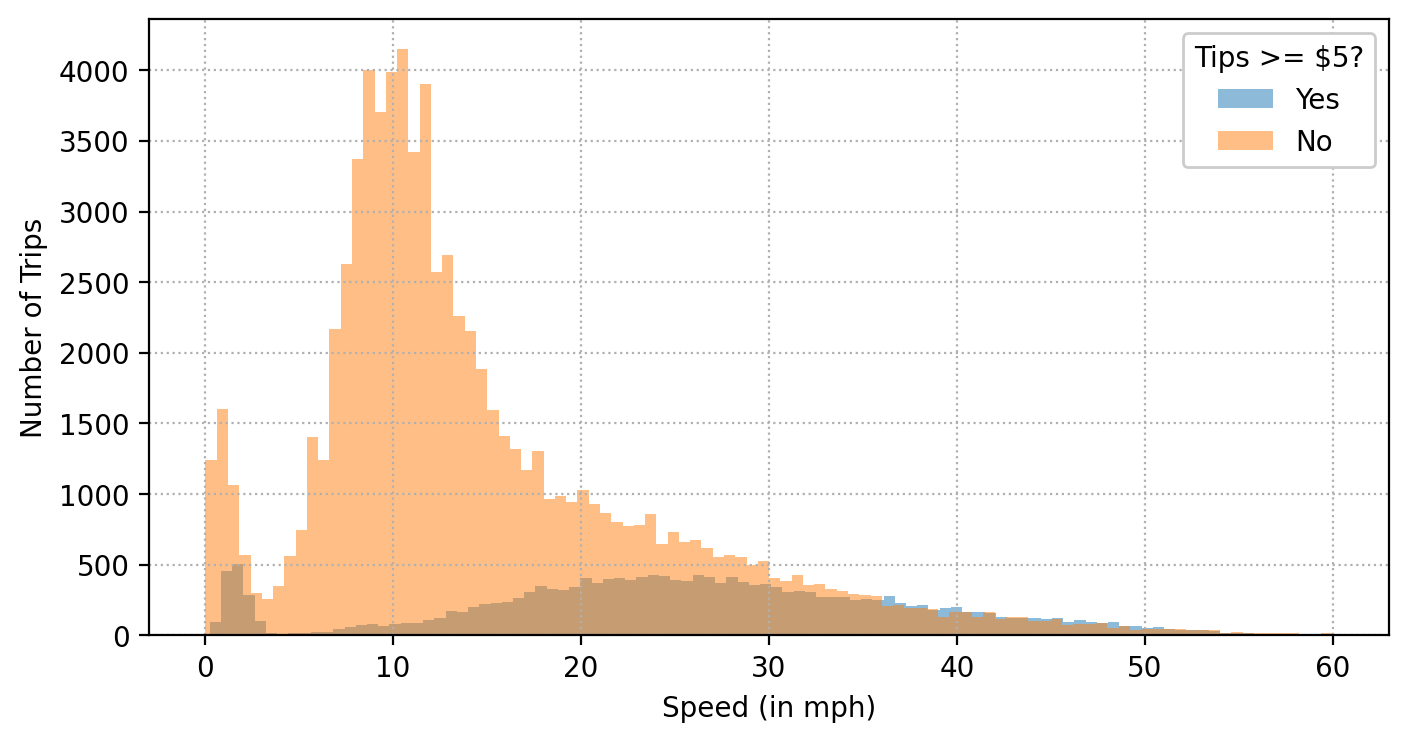

In [21]:
# Q: What is the distribution of speed per class label?
plt.figure(figsize=(8, 4))
x = 'speed'
plt.hist(df[x][(df[x] <= 60) & df['tips_5']], bins=100, alpha=0.5, label='Yes')
plt.hist(df[x][(df[x] <= 60) & ~df['tips_5']], bins=100, alpha=0.5, label='No')
plt.grid(linestyle=':')
plt.xlabel('Speed (in mph)')
plt.ylabel('Number of Trips')
plt.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
plt.show()

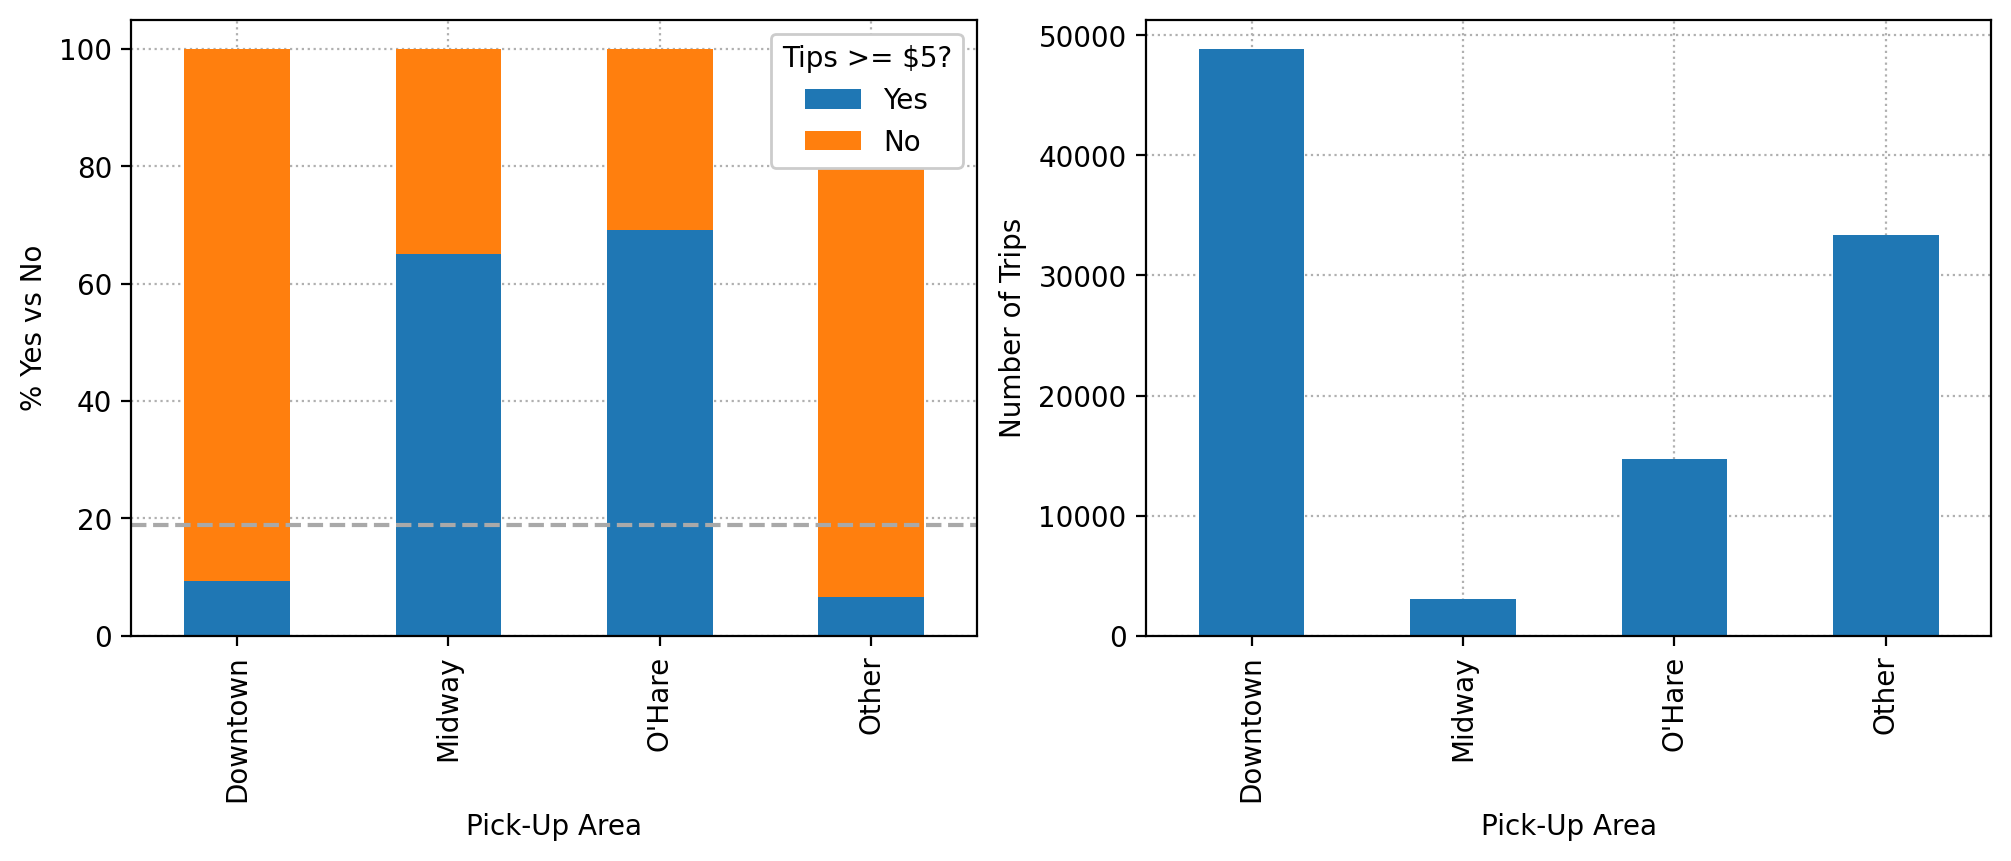

In [22]:
# Q: What is the distribution of class label per pick-up area?
plt.figure(figsize=(12, 4))

x = 'pickup_area'
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Pick-Up Area')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Pick-Up Area')
ax2.set_ylabel('Number of Trips')

plt.show()

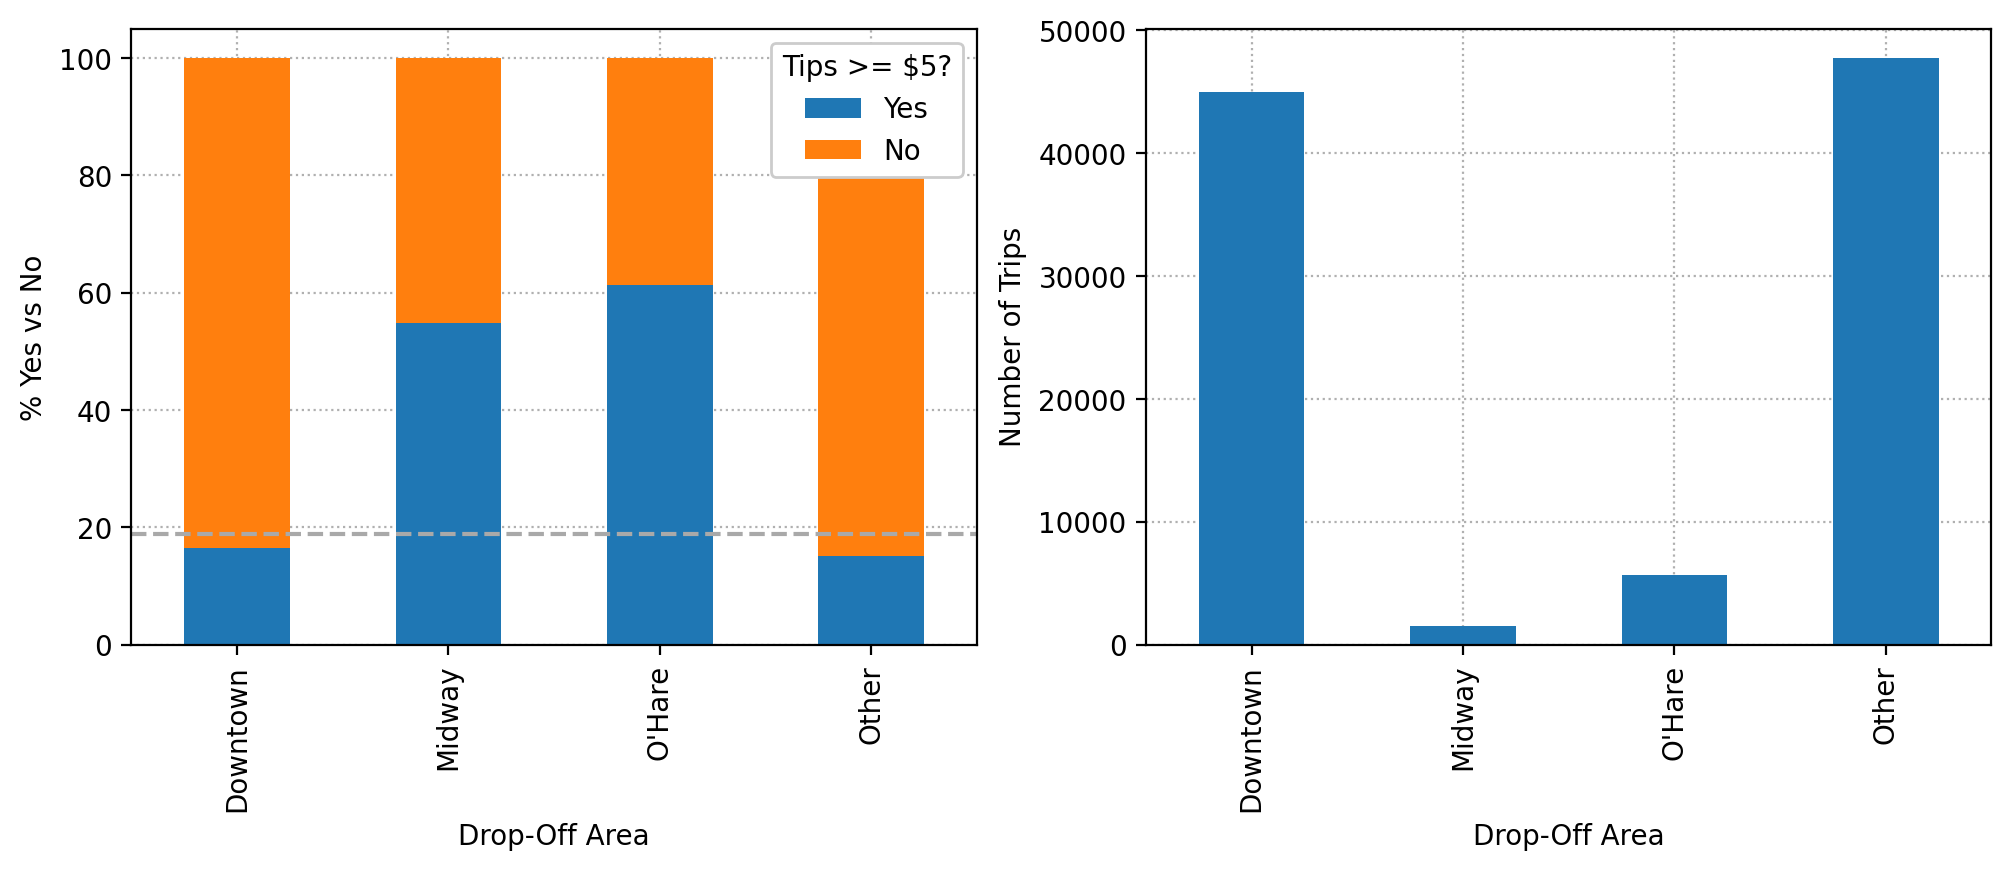

In [23]:
# Q: What is the distribution of class label per drop-off area?
plt.figure(figsize=(12, 4))

x = 'dropoff_area'
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Drop-Off Area')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Drop-Off Area')
ax2.set_ylabel('Number of Trips')

plt.show()

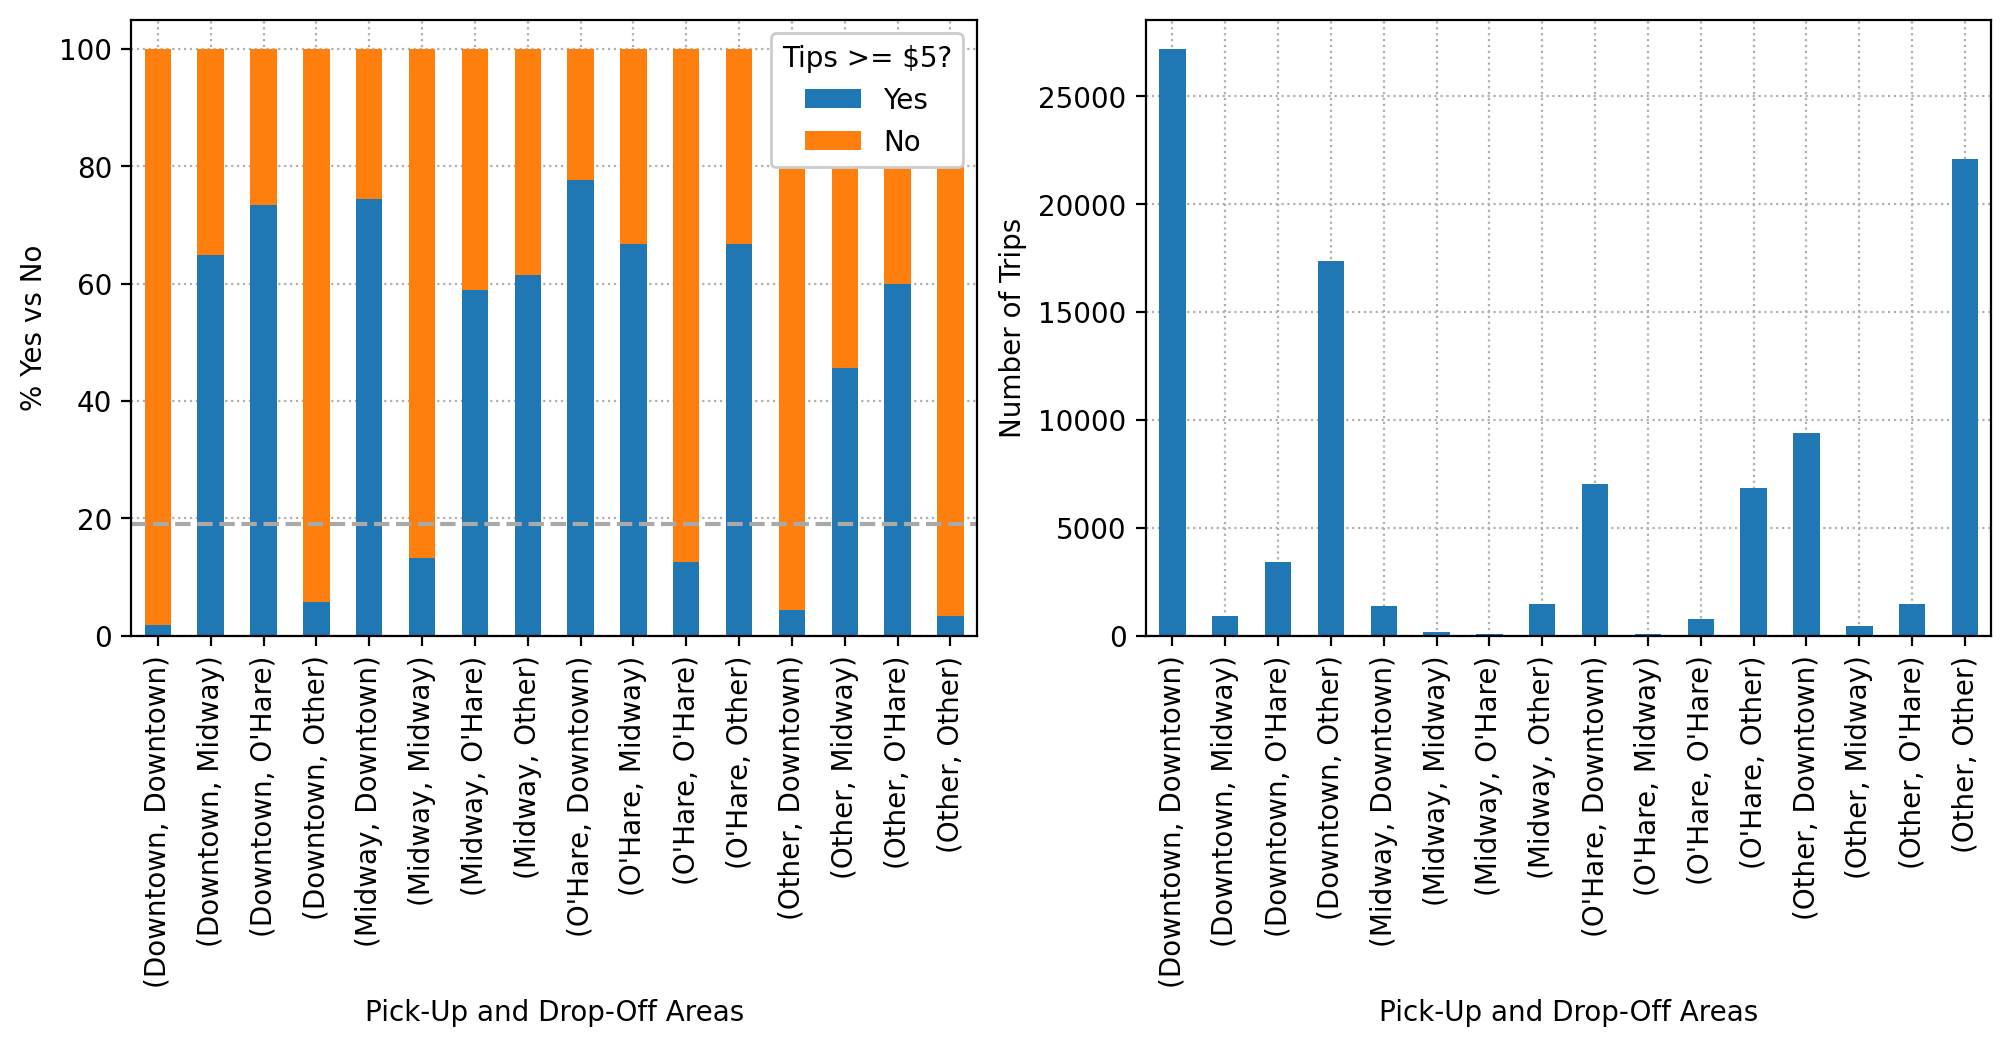

In [24]:
# Q: What is the distribution of class label per pick-up and drop-off areas?
plt.figure(figsize=(12, 4))

x = ['pickup_area', 'dropoff_area']
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Pick-Up and Drop-Off Areas')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Pick-Up and Drop-Off Areas')
ax2.set_ylabel('Number of Trips')

plt.show()

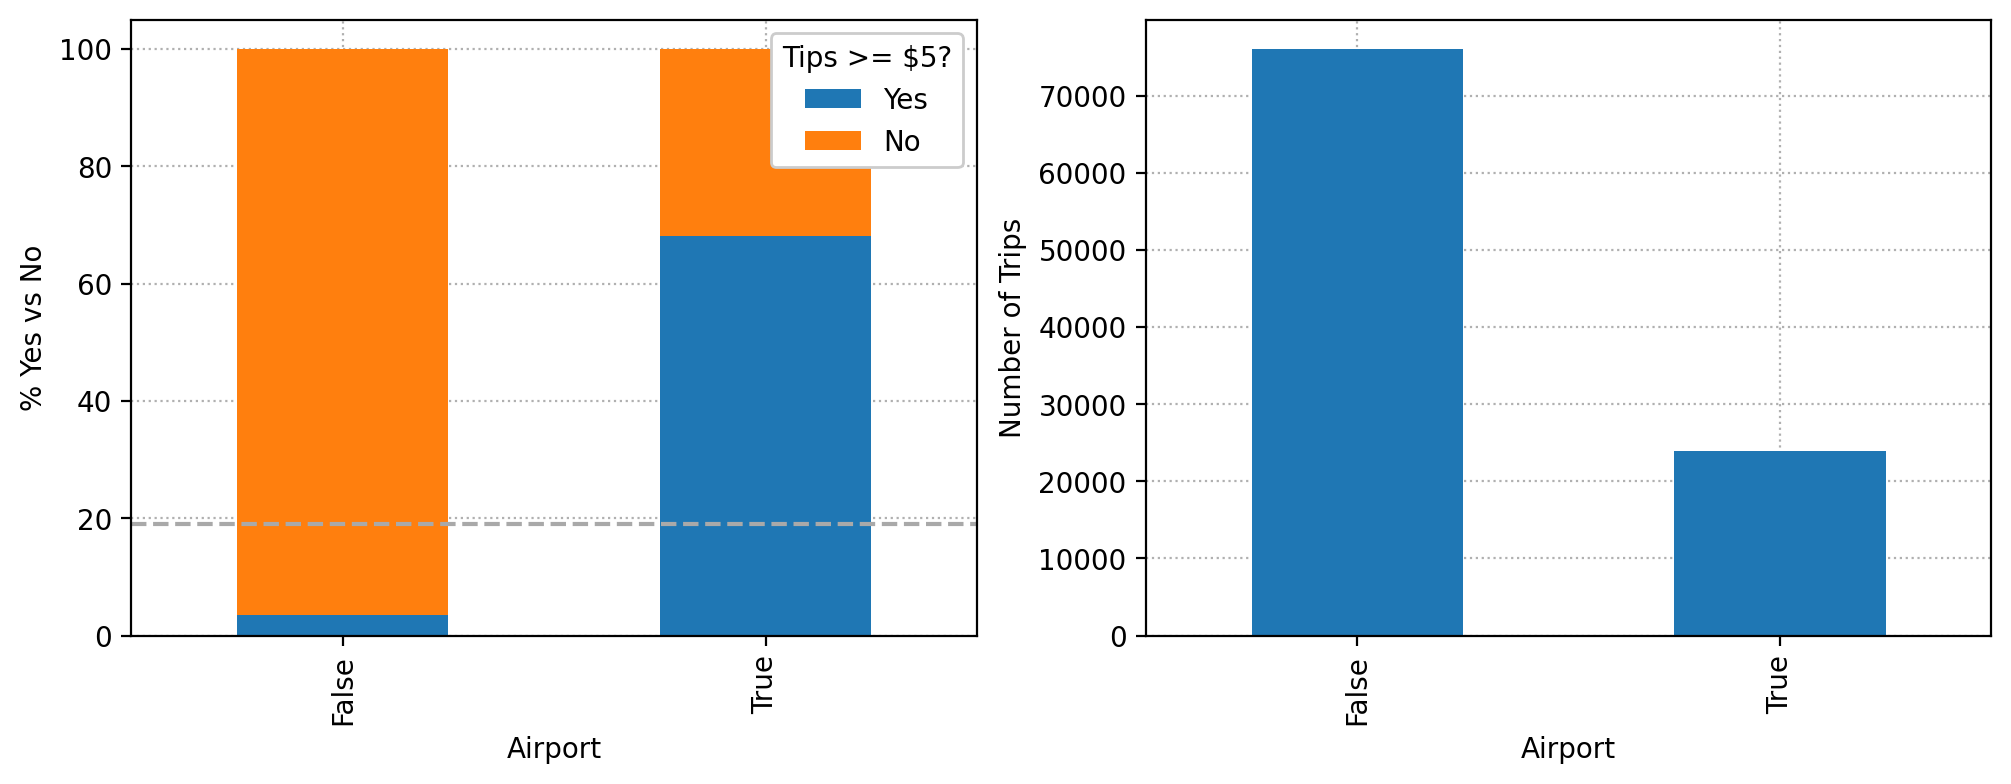

In [25]:
# Q: What is the distribution of class label per airport trip or not?
plt.figure(figsize=(12, 4))

x = 'airport'
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Airport')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Airport')
ax2.set_ylabel('Number of Trips')

plt.show()

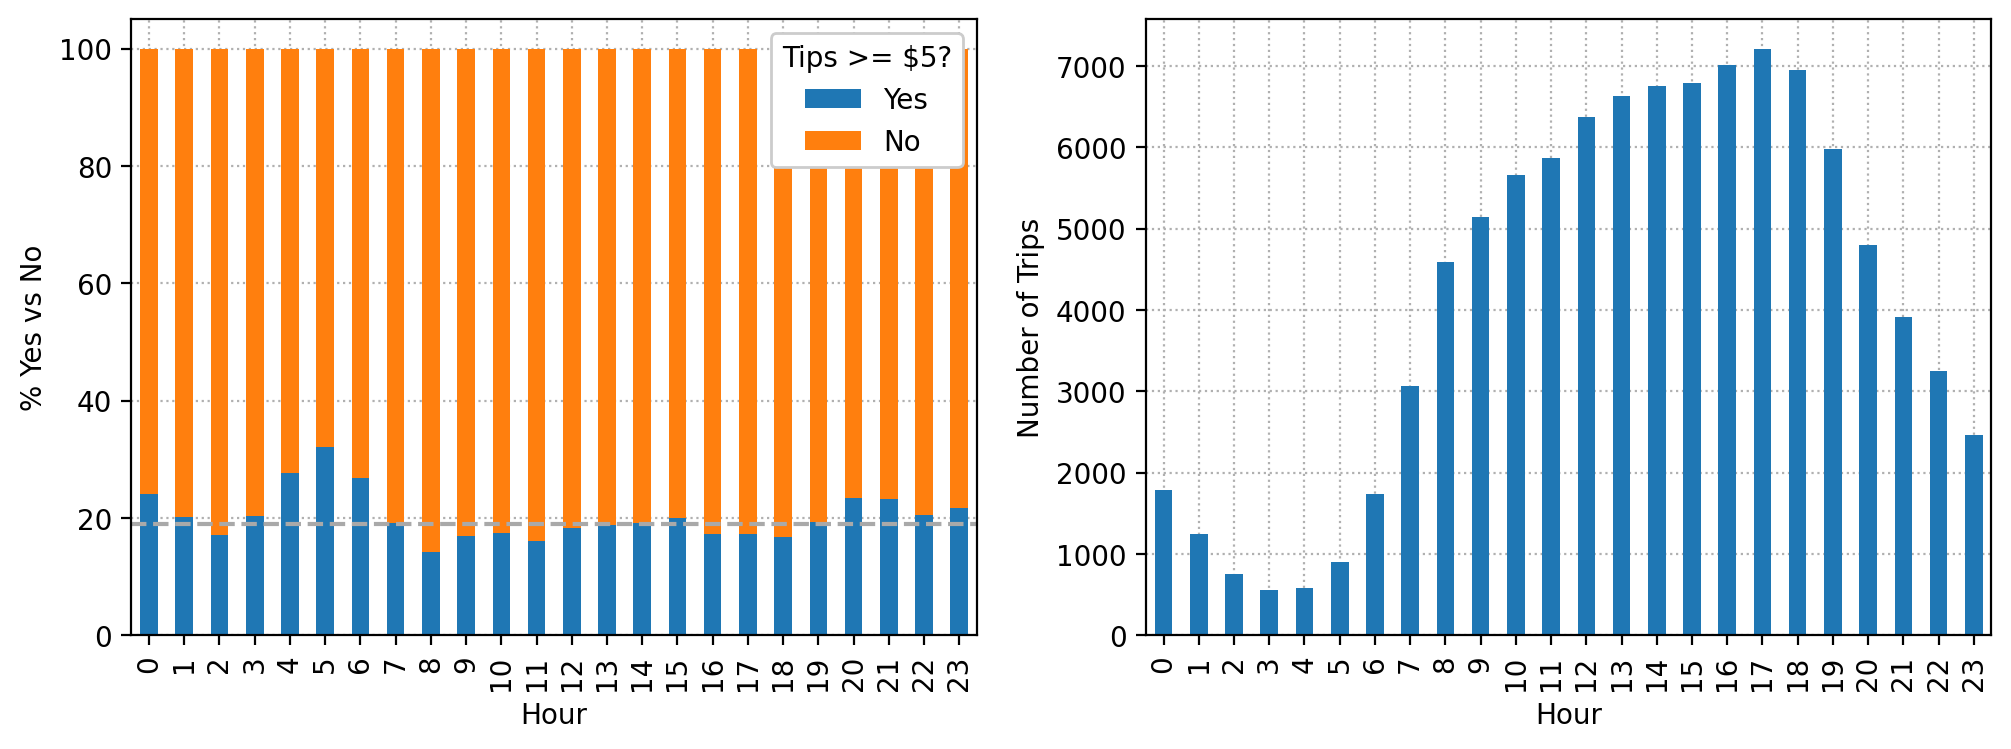

In [26]:
# Q: What is the distribution of class label per hour?
plt.figure(figsize=(12, 4))

x = 'hour'
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Hour')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Number of Trips')

plt.show()

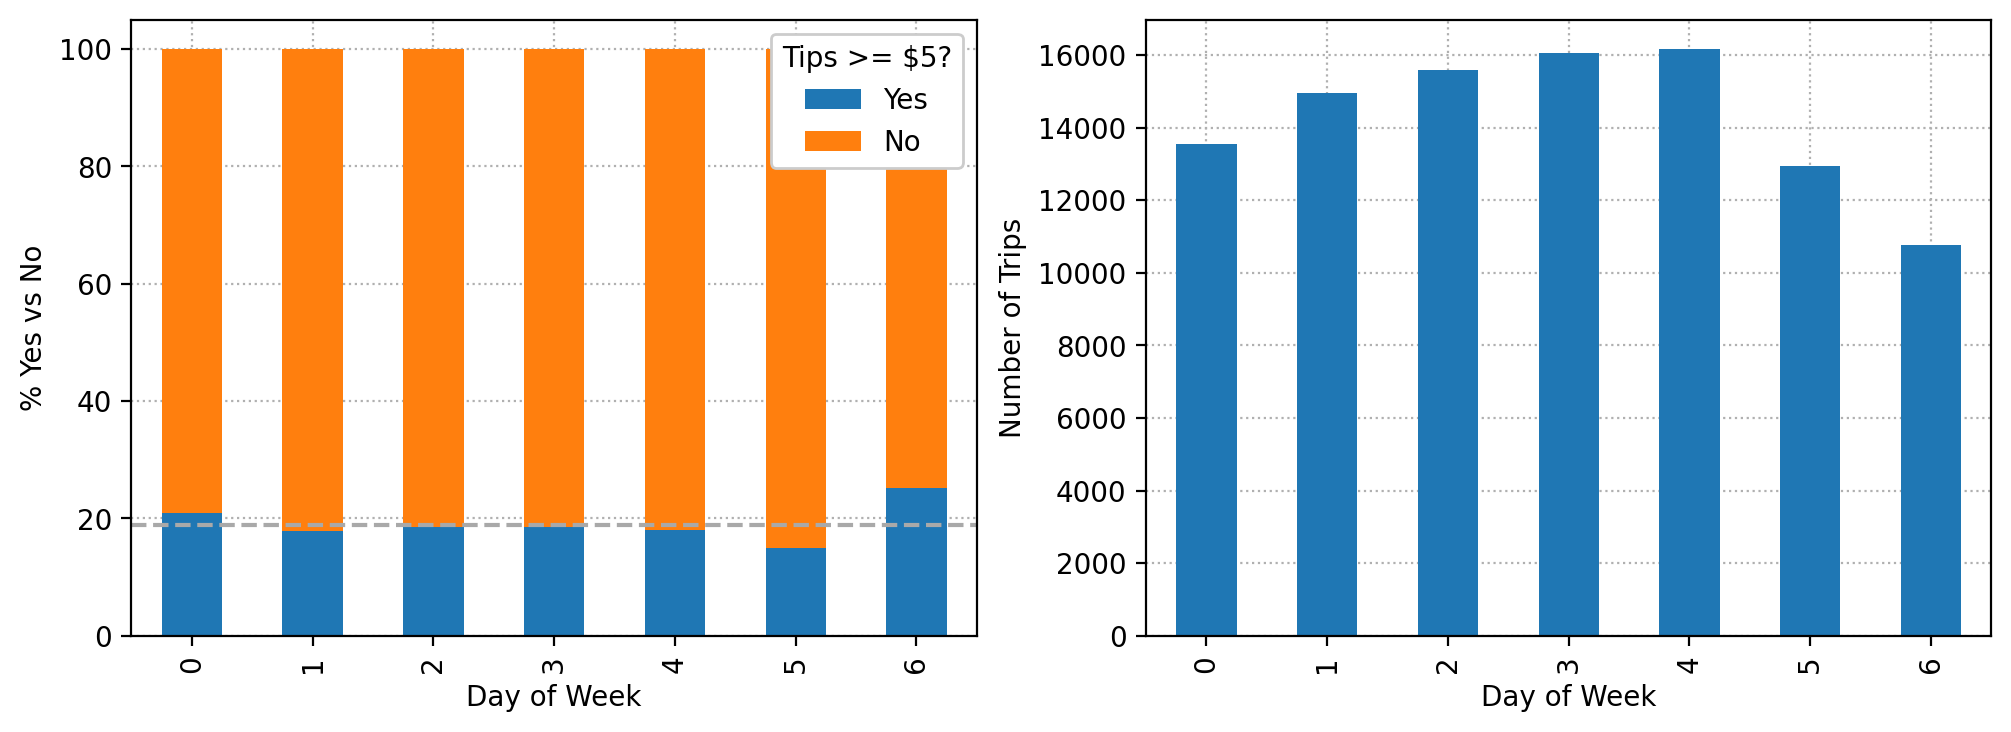

In [27]:
# Q: What is the distribution of class label per day of week?
plt.figure(figsize=(12, 4))

x = 'day_of_week'
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Number of Trips')

plt.show()

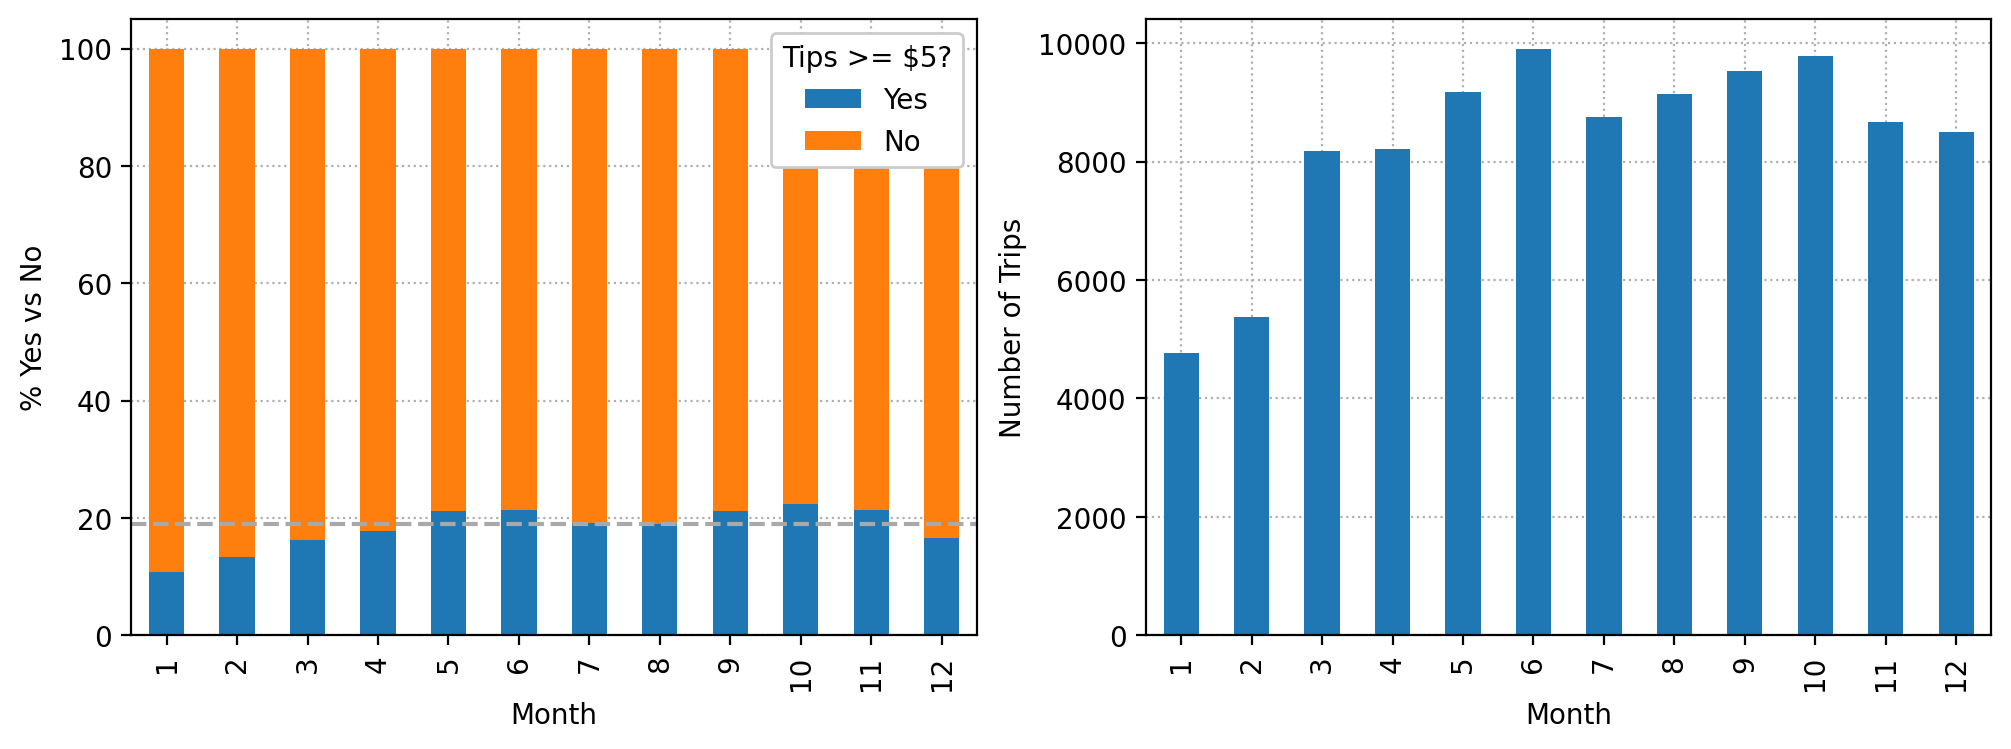

In [28]:
# Q: What is the distribution of class label per month?
plt.figure(figsize=(12, 4))

x = 'month'
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Month')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Trips')

plt.show()

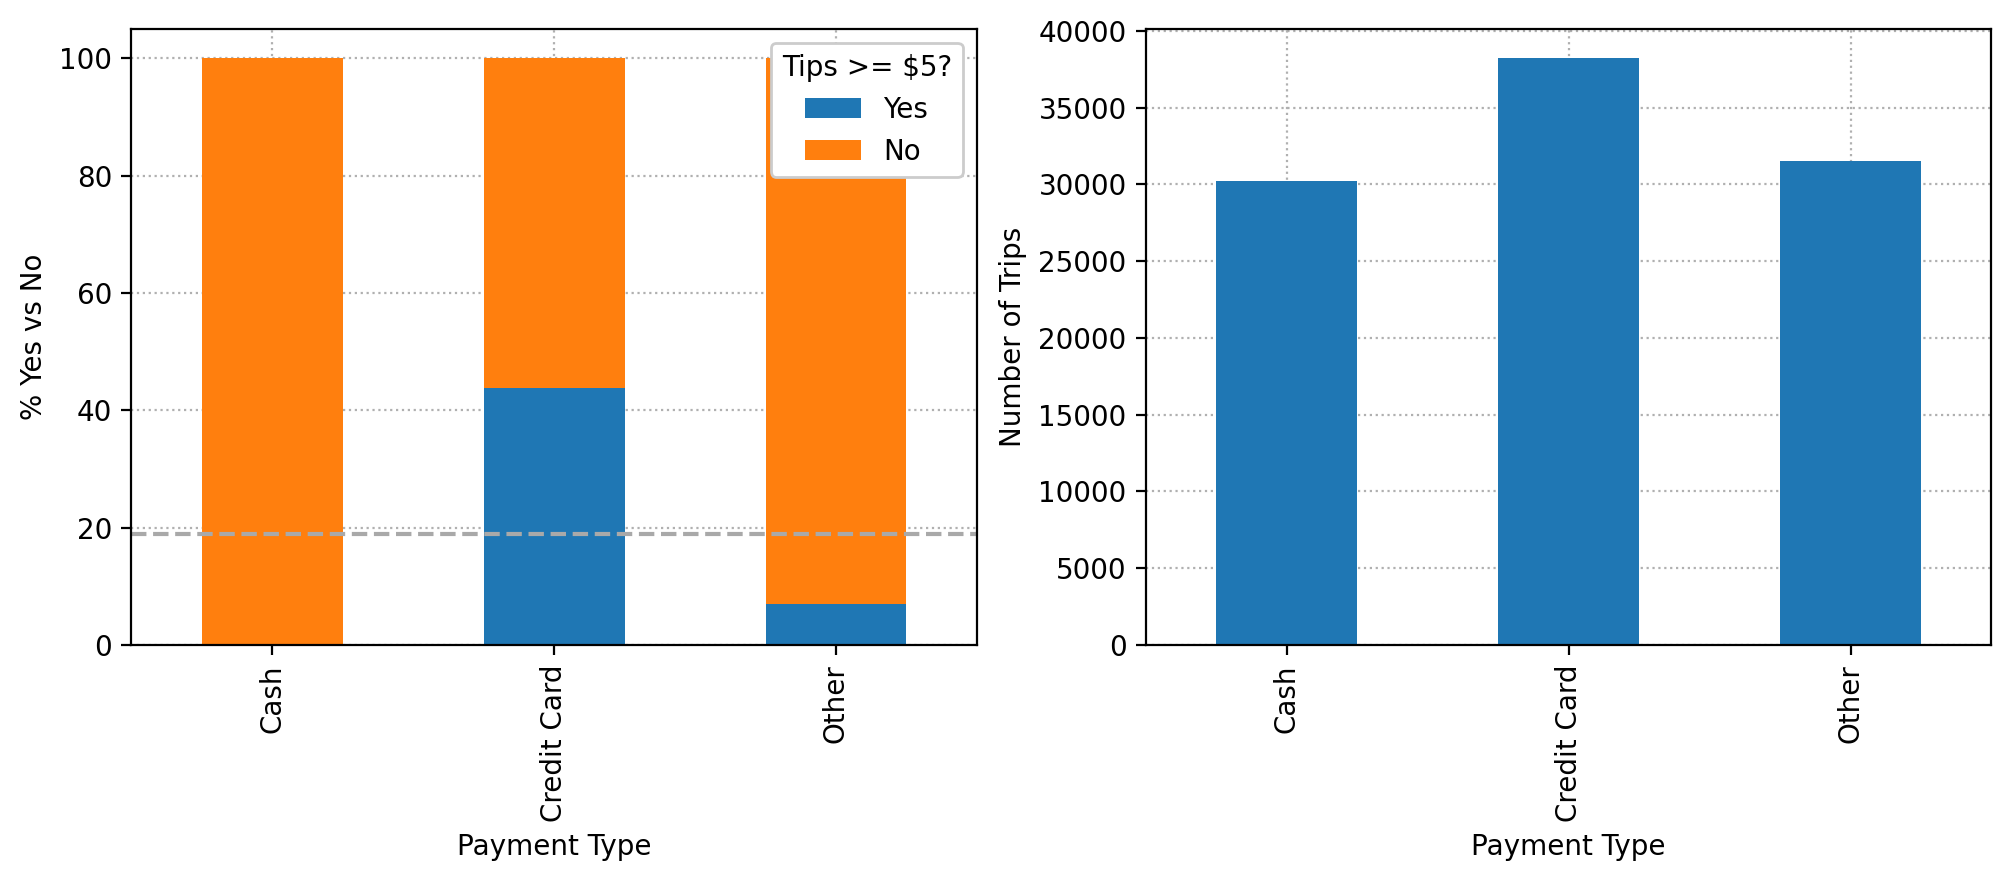

In [29]:
# Q: What is the distribution of class label per payment type?
plt.figure(figsize=(12, 4))

x = 'payment_type'
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Payment Type')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Payment Type')
ax2.set_ylabel('Number of Trips')

plt.show()

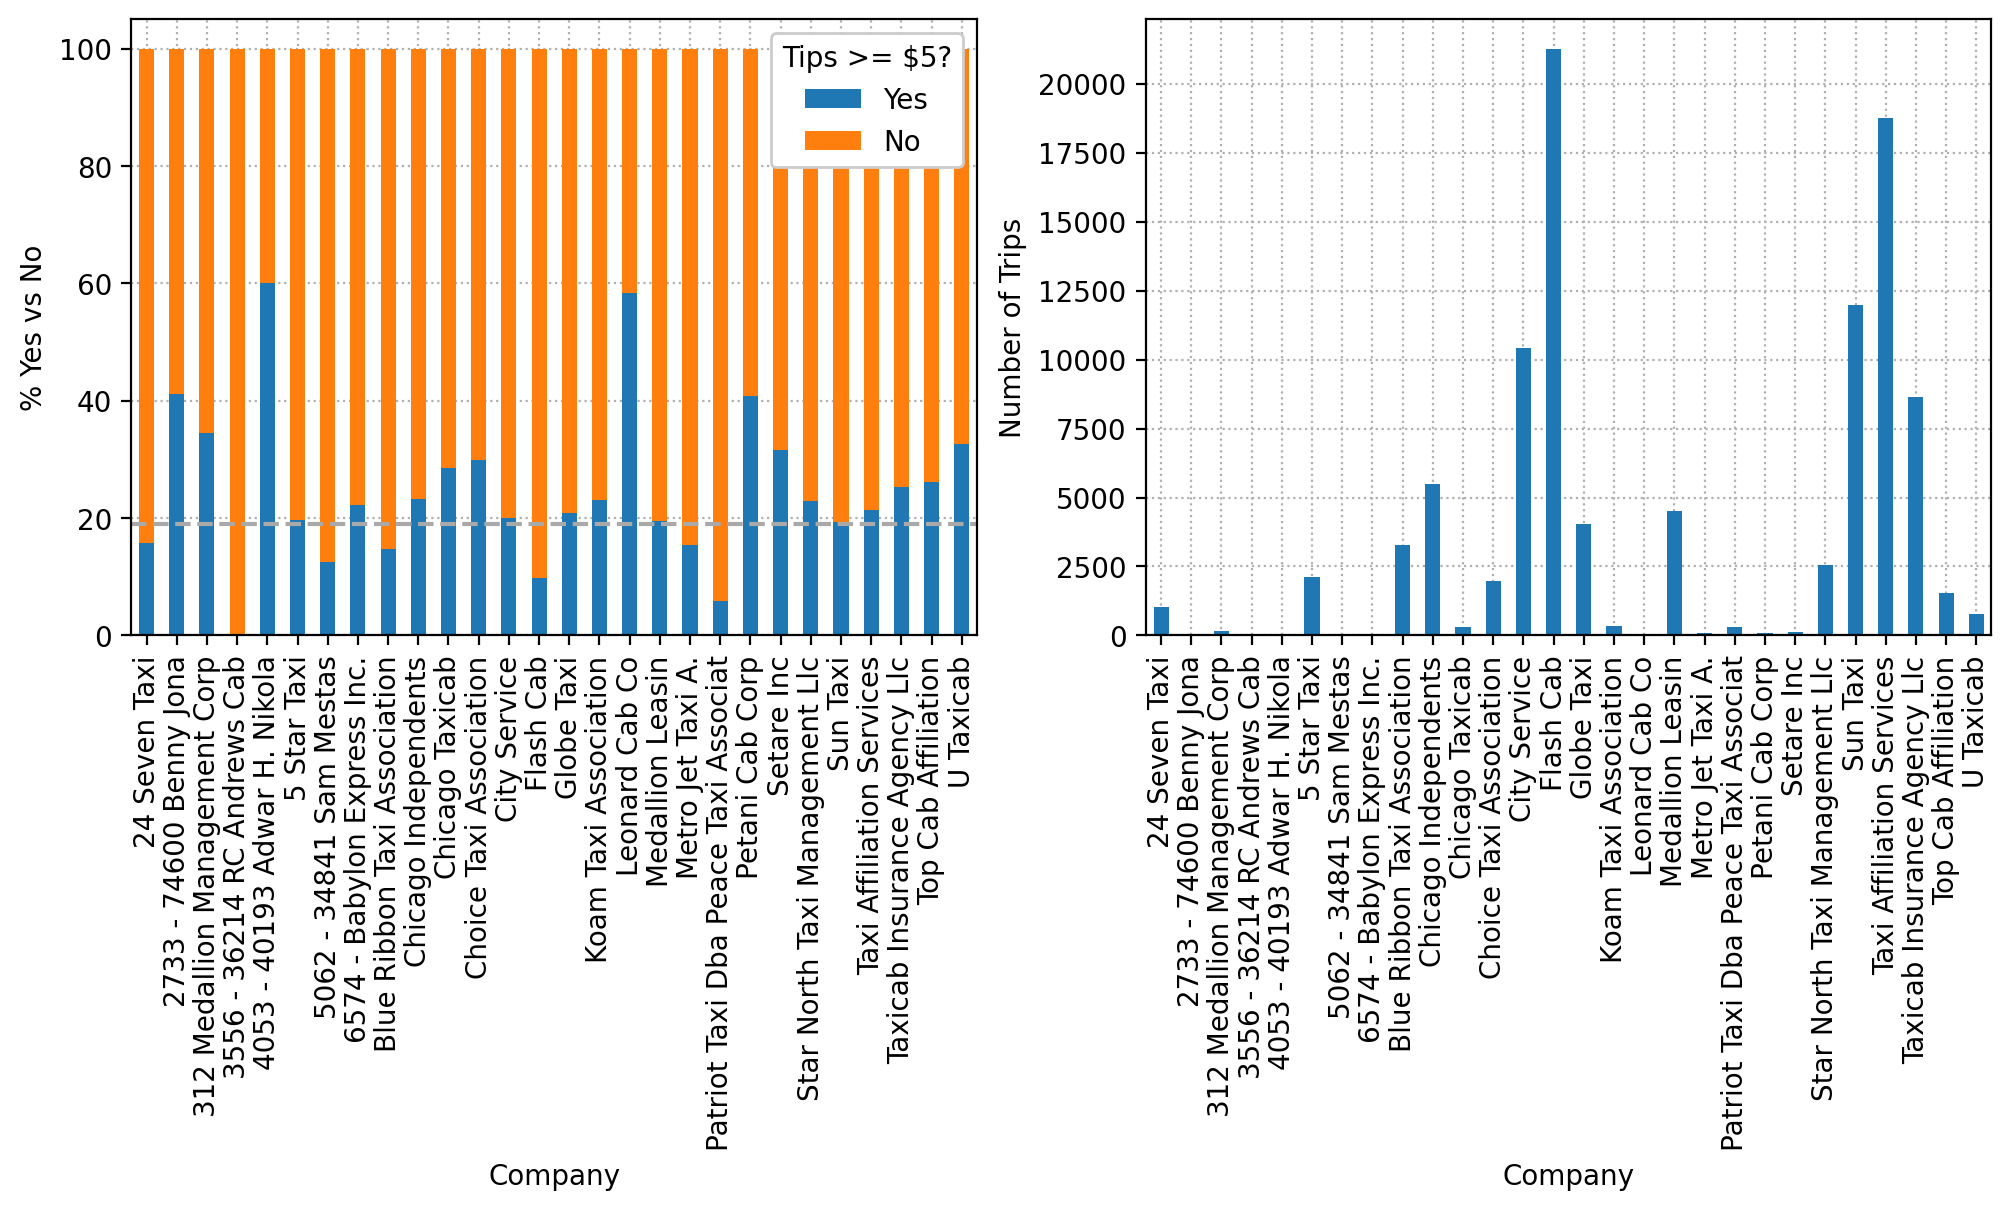

In [30]:
# Q: What is the distribution of class label per taxi company?
plt.figure(figsize=(12, 4))

x = 'company'
ax1 = plt.subplot(1, 2, 1)
df2 = (df
       .groupby(x)
       .agg({'tips_5': 'mean'})
       .rename(columns={'tips_5': 'Yes'}))
df2['No'] = 1 - df2['Yes']
ax1 = (df2 * 100).plot(kind='bar', stacked=True, ax=ax1)
ax1.axhline(df['tips_5'].mean() * 100, linestyle='--', color='darkgray', zorder=1.5)
ax1.grid(linestyle=':')
ax1.set_axisbelow(True)
ax1.legend(loc='upper right', framealpha=1, title='Tips >= $5?')
ax1.set_xlabel('Company')
ax1.set_ylabel('% Yes vs No')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Company')
ax2.set_ylabel('Number of Trips')

plt.show()

**Conclusion on Explanatory Variables**
- Useful: `fare` (or `trip_miles`) > `airport` > `early_morning` > `day_of_week` for Sunday
- Useless: `trip_minutes`, `speed`, `payment_type`, `company`

# Step 5a: Logistic regression via statsmodels
>**Model:** $\text{logit}(\text{tips \$5}) = -4.78 + 0.12\,(\text{fare})$

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# https://pandas.pydata.org/docs/user_guide/categorical.html
df['tips_5'] = pd.Categorical(df['tips_5'], categories=[True, False]) # 1st category is "success"

# https://www.statsmodels.org/stable/glm.html
model = smf.glm(formula='tips_5 ~ fare', family=sm.families.Binomial(), data=df).fit()

print(model.summary())

                         Generalized Linear Model Regression Results                         
Dep. Variable:     ['tips_5[True]', 'tips_5[False]']   No. Observations:               100000
Model:                                           GLM   Df Residuals:                    99998
Model Family:                               Binomial   Df Model:                            1
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -29681.
Date:                               Tue, 03 Dec 2024   Deviance:                       59362.
Time:                                       17:14:59   Pearson chi2:                 8.84e+07
No. Iterations:                                    7   Pseudo R-squ. (CS):             0.3141
Covariance Type:                           nonrobust                                         
                 coef    std err          z      P>|z|      

In [32]:
type(model)

statsmodels.genmod.generalized_linear_model.GLMResultsWrapper

In [33]:
model.nobs # Number of observed data points    See dir(model)

100000

In [34]:
model.family # Binomial family

In [35]:
model.family.link # Logit link function is default

In [36]:
model.params # Beta's

Intercept   -4.776004
fare         0.123143
dtype: float64

In [37]:
model.fit_history['iteration'] # Fisher scoring number of iteration

7

In [38]:
model.converged # Fisher scoring converged or not?

True

In [39]:
model.fittedvalues # Fitted probability p_i

0        0.014027
1        0.023447
2        0.025998
3        0.087550
4        0.018423
           ...   
99995    0.045131
99996    0.045131
99997    0.013608
99998    0.045131
99999    0.329097
Length: 100000, dtype: float64

In [40]:
model.mu # Fitted probability p_i

array([0.01402701, 0.02344704, 0.02599831, ..., 0.01360754, 0.04513138,
       0.32909727])

In [41]:
model.predict() # Also model.predict(which='mean')

array([0.01402701, 0.02344704, 0.02599831, ..., 0.01360754, 0.04513138,
       0.32909727])

In [42]:
model.predict(which='linear') # Fitted linear predictor i.e. b0 + b1*x1 + ... + b_d*x_d before link function

array([-4.25264443, -3.72928485, -3.6233815 , ..., -4.28343029,
       -3.05199599, -0.71227082])

In [43]:
# Predict for new x
new_x = pd.DataFrame({'fare': [50]})
model.predict(new_x) # Predicted probability p

0    0.799178
dtype: float64

In [44]:
model.predict(new_x, which='linear') # Predicted linear predictor

0    1.381167
dtype: float64

In [45]:
o = model.get_prediction(new_x)
o.predicted, o.predicted_mean, o.linpred.predicted, o.linpred.predicted_mean

(array([0.79917844]),
 array([0.79917844]),
 array([1.38116749]),
 array([1.38116749]))

In [46]:
# import patsy # https://patsy.readthedocs.io/en/latest/formulas.html#the-formula-language
import statsmodels.api as sm

x = sm.add_constant(df['fare']) # Design matrix with a column of 1's for the intercept term
y = df['tips_5']
# y, x = patsy.dmatrices('tips_5 ~ fare', data=df, return_type='dataframe')

print(sm.GLM(y, x, family=sm.families.Binomial()).fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 tips_5   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29681.
Date:                Tue, 03 Dec 2024   Deviance:                       59362.
Time:                        17:15:00   Pearson chi2:                 8.84e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3141
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7760      0.029   -166.155      0.0

# Step 5b: Logistic regression via Scikit-Learn
>**Model:** $\text{logit}(\text{tips \$5}) = -4.78 + 0.12\,(\text{fare})$

In [47]:
import sklearn.linear_model # https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

x = df[['fare']] # (n,1)-shape
y = df['tips_5'] # (n,)-shape
model = sklearn.linear_model.LogisticRegression(penalty=None).fit(x, y) # Use fit_intercept=True and solver='lbfgs'

In [48]:
model.intercept_, model.coef_ # Beta's

(array([-4.77613926]), array([[0.12314726]]))

In [49]:
model.n_iter_ # Number of iterations for solver

array([14])

In [50]:
model.predict_proba(x) # 1 - p_i = P(Y_i=0) and p_i = P(Y=1)

array([[0.98597464, 0.01402536],
       [0.97655531, 0.02344469],
       [0.97400421, 0.02599579],
       ...,
       [0.98639407, 0.01360593],
       [0.95487214, 0.04512786],
       [0.67090466, 0.32909534]])

In [51]:
model.predict_log_proba(x) # Just log(1 - p_i) and log(p_i)

array([[-0.01412465, -4.26688804],
       [-0.02372389, -3.7531114 ],
       [-0.02633966, -3.64982053],
       ...,
       [-0.01369934, -4.29724954],
       [-0.04617784, -3.0982554 ],
       [-0.39912824, -1.11140778]])

In [52]:
model.predict(x)[:50] # y_hat = 1 if p_i >= 0.5 i.e. using tau = 0.5 as threhsold

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
(model.predict_proba(x)[:,1] >= 0.5)[:50] # Verify same as thresholding p_i >= 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [54]:
model.score(x, y), np.mean(model.predict(x) == y) # Accuracy

(0.8788, 0.8788)

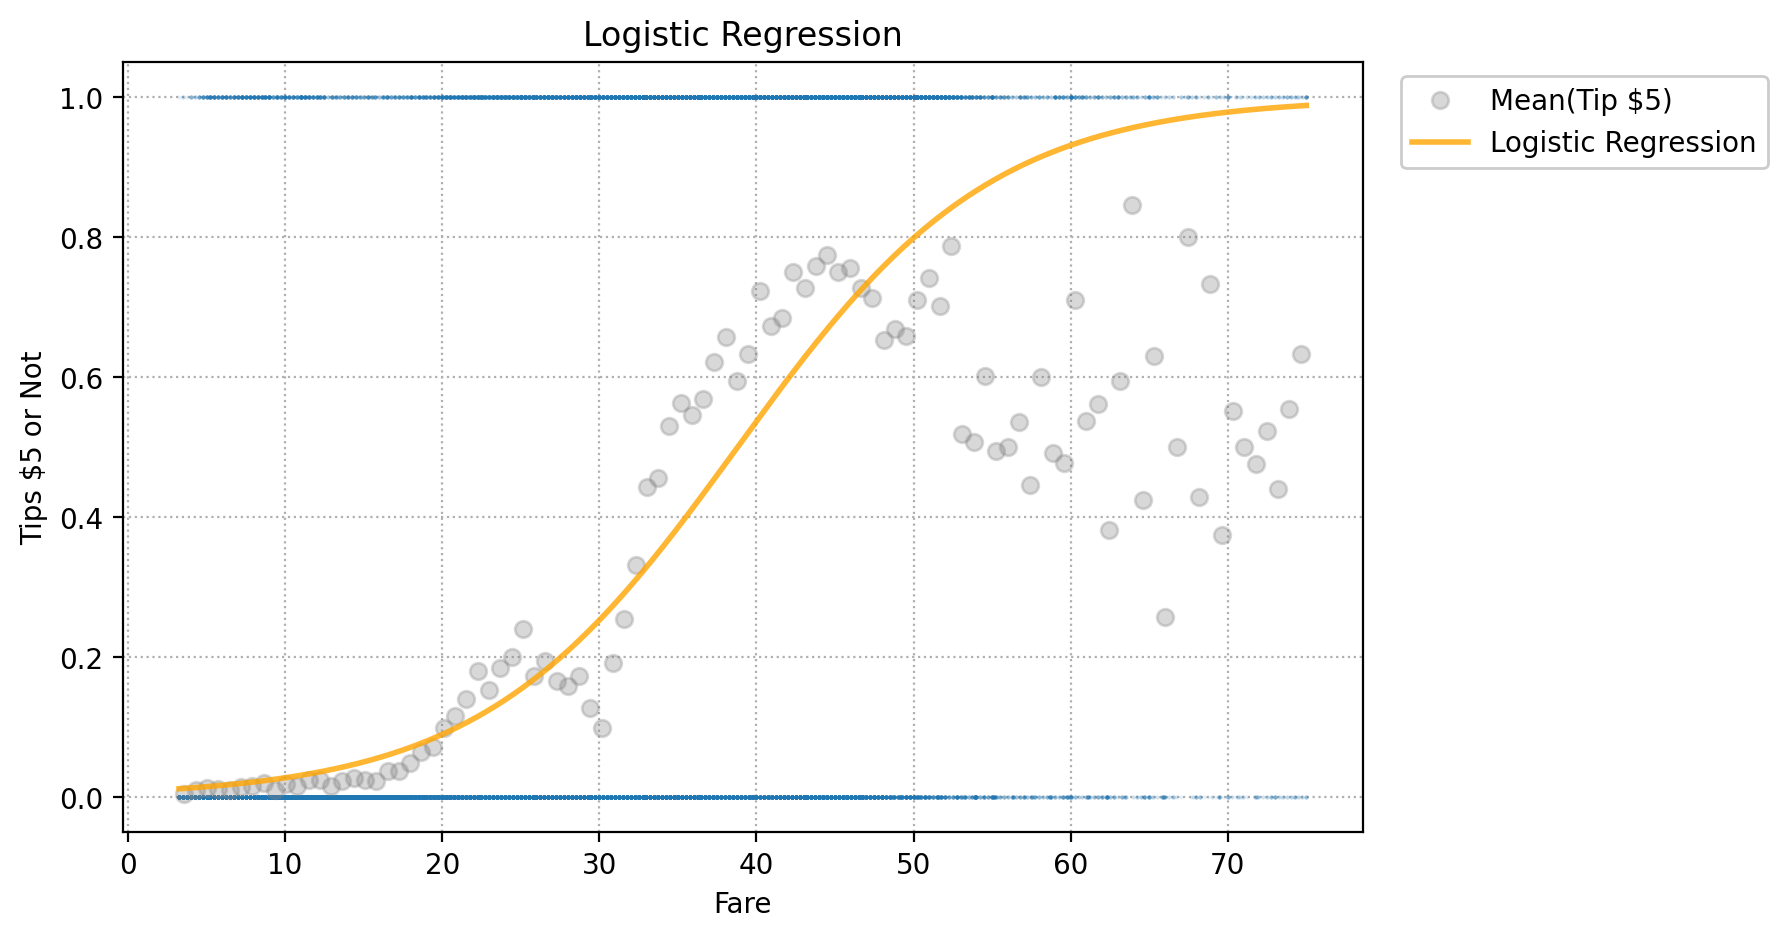

In [55]:
plt.figure(figsize=(8, 5))

# Plot x vs y
upper_fare = 75
df2 = df[['fare', 'tips_5']][df['fare'] <= upper_fare].copy()
plt.plot(df2['fare'], df2['tips_5'], '.', markersize=1, alpha=0.1)

# Plot bucket of x vs mean of y
num_bucket = 100
df2['tips_5'] = df2['tips_5'].astype(bool)
df2['fare_bucket'], buckets = pd.cut(df2['fare'], num_bucket, retbins=True)
df3 = (df2
       .groupby('fare_bucket', observed=False)
       .agg({'tips_5': 'mean'})
       .assign(bucket=(buckets[:-1] + buckets[1:]) / 2))
plt.plot(df3['bucket'], df3['tips_5'], 'o', color='gray', alpha=0.3, label='Mean(Tip $5)')

# Plot logistic regression
new_x = pd.DataFrame({'fare': np.linspace(df2['fare'].min(), df2['fare'].max(), 1000)})
plt.plot(new_x, model.predict_proba(new_x)[:,1], linewidth=2, color='orange', alpha=0.8, label='Logistic Regression')

plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Tips $5 or Not')
plt.title('Logistic Regression')
plt.legend(framealpha=1, bbox_to_anchor=(1.02, 1))
plt.show()